<h1 align="center">Volume 4: Spectral 1.</h1>

    Bryant McArthur
    Section #
    January 19, 2023

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate as bary
from numpy import linalg as la
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib inline

# Setup

In [7]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

# Problem 1

Use the differentiation matrix to numerically approximate the derivative of u(x)) on a grid of N Chebychev points where N = 6, 8, and 10.
Then use barycentric interpolation (scipy.interpolate.barycentric_interpolate) to
approximate u0 on a grid of 100 evenly spaced points.
Graphically compare your approximation to the exact derivative

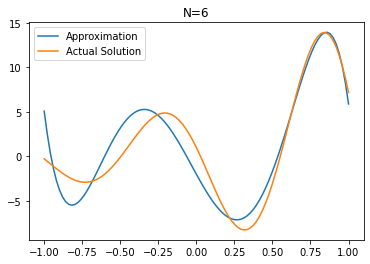

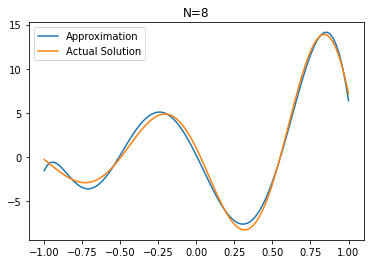

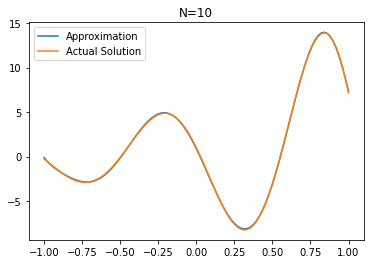

In [25]:
# define functions
u = lambda x: np.exp(x)*np.cos(6*x)
uprime = lambda x: -6*np.exp(x)*np.sin(6*x) + np.exp(x)*np.cos(6*x)

# Iterate through N
for N in [6,8,10]:
    D, x = cheb(N)
    baryx = np.linspace(x[0], x[-1], 100)
    
    # Approximate
    Uprime = D@u(x)
    
    #Interpolate
    y = bary(x, Uprime, baryx)
    
    # Plot
    plt.plot(baryx, y, label="Approximation")
    plt.plot(baryx, uprime(baryx), label="Actual Solution")
    plt.legend()
    plt.title(f"N={N}")
    plt.show()
    

# Problem 2

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points. Compare your numerical solution with the exact solution.

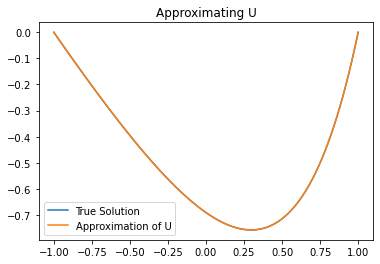

In [33]:
# Set Up
D,x = cheb(8)
ddu = lambda x: np.exp(2*x)
even_x = np.linspace(x[0], x[-1], 100)

# Force Conditions
D2 = np.dot(D,D)
D2[0,:], D2[-1,:]= 0,0
D2[0,0], D2[-1,-1] = 1,1
F = ddu(x)
F[0], F[-1] = 0,0

# Approximate
U = la.solve(D2,F)

# Interpolate
y = bary(x, U, baryx)

u = lambda x: (-np.cosh(2)-np.sinh(2)*x + np.exp(2*x))/4

# Plot
plt.plot(even_x, u(even_x), label="True Solution")
plt.plot(even_x, y, label="Approximation of U")
plt.legend()
plt.title("Approximating U")
plt.show()

# Problem 3

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points.

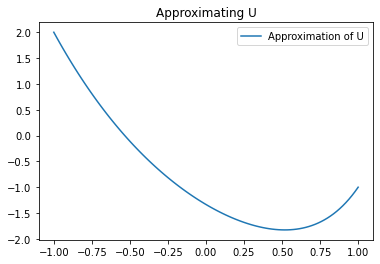

In [36]:
# Set Up
D,x = cheb(8)
domain = np.linspace(x[0], x[-1], 100)
f = lambda x: np.exp(3*x)

# Force Conditions
D2 = np.dot(D,D)
BigD = D2 + D
BigD[0,:], BigD[-1,:]= 0,0
BigD[0,0], BigD[-1,-1] = 1,1
F = f(x)
F[-1], F[0] = 2,-1

# Approximate
U = la.solve(BigD,F)

# Interpolate
y = bary(x, U, domain)

# Plot
plt.plot(domain, y, label="Approximation of U")
plt.legend()
plt.title("Approximating U")
plt.show()

# Problem 4

Use the pseudospectral method to solve the boundary value problem
for several values of λ: λ = 4, 8, 12. Begin by transforming this BVP onto the domain −1 <
x < 1. Use N = 20 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points

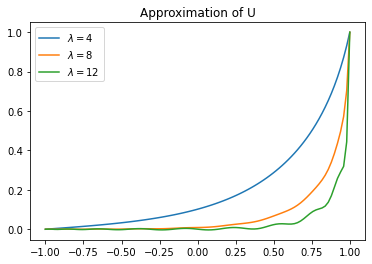

In [71]:
# Set Up
D,x = cheb(20)
D2 = np.dot(D,D)
D2[0,:], D2[-1,:]= 0,0
D2[0,0], D2[-1,-1] = 1,1
domain = np.linspace(x[0], x[-1], 100)

# Iterate through Lambdas
for lam in [4,8,12]:
    guess = np.random.rand(21)/100
    def F(U):
        out = D2@U - 1/4*lam*np.sinh(lam*U)
        out[-1], out[0] = U[0]-1, U[-1]
        return out
    # Newton's Method
    solution = root(F, guess).x
    
    # Interpolate
    y = bary(x, solution, domain)

    # Plot
    plt.plot(domain, y, label=rf"$\lambda={lam}$")
    plt.legend()
    plt.title("Approximation of U")
plt.show()

# Problem 5

Find the function y(x) that satisies y(−1) = 1, y(1) = 7, and whose surface of
revolution (about the x-axis) minimizes surface area. Compute the surface area, and plot the
surface. Use N = 50 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points.
Below is sample code for creating the 3D wireframe figure.

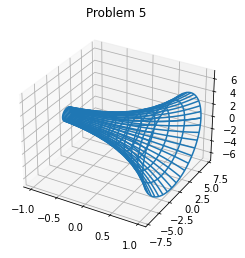

In [84]:
# Set Up
D,x = cheb(50)
D2 = np.dot(D,D)
D2[0,:], D2[-1,:]= 0,0
D2[0,0], D2[-1,-1] = 1,1
lin = np.linspace(x[0], x[-1], 100)
theta = np.linspace(0,2*np.pi, 401)
X,T = np.meshgrid(lin, theta)

def F(Y):
    out = Y*(D2@Y)-(D@Y)*(D@Y)-np.ones(51)
    out[-1], out[0] = Y[0]-7, Y[-1]-1
    return out
# Newton's Method
guess = np.ones(51)*2
barycentric = root(F, guess).x

# Interpolate
y = bary(x, barycentric, lin)

Y,Z = y*np.cos(T), y*np.sin(T)

# Plot it
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(X,Y,Z, rstride=10, cstride=10)
plt.title("Problem 5")
plt.show()
